# Specifying Data in Altair

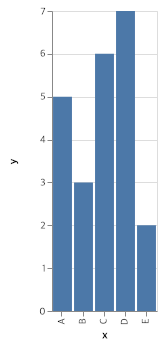

In [8]:
# can infer the types (DataFrame)

import altair as alt
import pandas as pd

data = pd.DataFrame({'x': ['A', 'B', 'C', 'D', 'E'],
                     'y': [5, 3, 6, 7, 2]})
alt.Chart(data).mark_bar().encode(
    x='x',
    y='y',
)

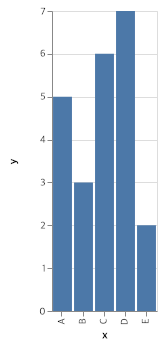

In [9]:
# cannot infer the types (JSON)

import altair as alt

data = alt.Data(values=[{'x': 'A', 'y': 5},
                        {'x': 'B', 'y': 3},
                        {'x': 'C', 'y': 6},
                        {'x': 'D', 'y': 7},
                        {'x': 'E', 'y': 2}])
alt.Chart(data).mark_bar().encode(
    x='x:O',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

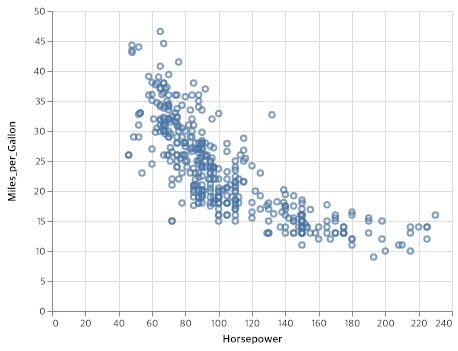

In [4]:
# cannot infer the types (url)

import altair as alt
from vega_datasets import data
url = data.cars.url

alt.Chart(url).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

In [11]:
import numpy as np
rand = np.random.RandomState(0)

data = pd.DataFrame({'value': rand.randn(100).cumsum()},
                    index=pd.date_range('2018', freq='D', periods=100))
data.head()

,value
2018-01-01,1.764052
2018-01-02,2.164210
2018-01-03,3.142948
2018-01-04,5.383841
2018-01-05,7.251399


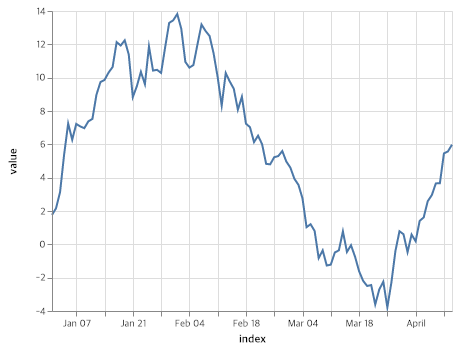

In [12]:
# only accesses dataframe columns

alt.Chart(data.reset_index()).mark_line().encode(
    x='index:T',
    y='value:Q'
)

In [14]:
wide_form = pd.DataFrame({'Date': ['2007-10-01', '2007-11-01', '2007-12-01'],
                          'AAPL': [189.95, 182.22, 198.08],
                          'AMZN': [89.15, 90.56, 92.64],
                          'GOOG': [707.00, 693.00, 691.48]})
print(wide_form)

     AAPL   AMZN        Date    GOOG
0  189.95  89.15  2007-10-01  707.00
1  182.22  90.56  2007-11-01  693.00
2  198.08  92.64  2007-12-01  691.48


In [15]:
# Altair works best with this long-form data

long_form = pd.DataFrame({'Date': ['2007-10-01', '2007-11-01', '2007-12-01',
                                   '2007-10-01', '2007-11-01', '2007-12-01',
                                   '2007-10-01', '2007-11-01', '2007-12-01'],
                          'company': ['AAPL', 'AAPL', 'AAPL',
                                      'AMZN', 'AMZN', 'AMZN',
                                      'GOOG', 'GOOG', 'GOOG'],
                          'price': [189.95, 182.22, 198.08,
                                     89.15,  90.56,  92.64,
                                    707.00, 693.00, 691.48]})
print(long_form)

         Date company   price
0  2007-10-01    AAPL  189.95
1  2007-11-01    AAPL  182.22
2  2007-12-01    AAPL  198.08
3  2007-10-01    AMZN   89.15
4  2007-11-01    AMZN   90.56
5  2007-12-01    AMZN   92.64
6  2007-10-01    GOOG  707.00
7  2007-11-01    GOOG  693.00
8  2007-12-01    GOOG  691.48


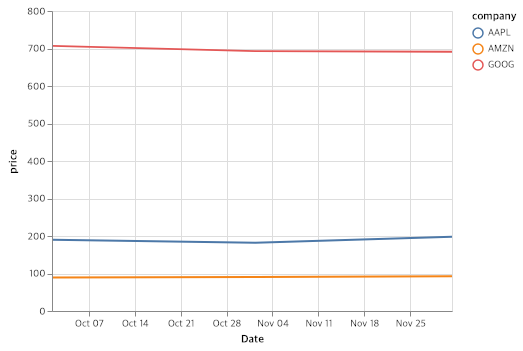

In [16]:
alt.Chart(long_form).mark_line().encode(
  x='Date:T',
  y='price:Q',
  color='company:N'
)

In [17]:
wide_form.melt('Date', var_name='company', value_name='price')

,Date,company,price
0,2007-10-01,AAPL,189.95
1,2007-11-01,AAPL,182.22
2,2007-12-01,AAPL,198.08
3,2007-10-01,AMZN,89.15
4,2007-11-01,AMZN,90.56
5,2007-12-01,AMZN,92.64
6,2007-10-01,GOOG,707.00
7,2007-11-01,GOOG,693.00
8,2007-12-01,GOOG,691.48


In [18]:
wide_form = long_form.pivot(index='Date', columns='company', values='price')
print(wide_form)

company       AAPL   AMZN    GOOG
Date                             
2007-10-01  189.95  89.15  707.00
2007-11-01  182.22  90.56  693.00
2007-12-01  198.08  92.64  691.48


# Encodings
- mapping of visual properties to data columns

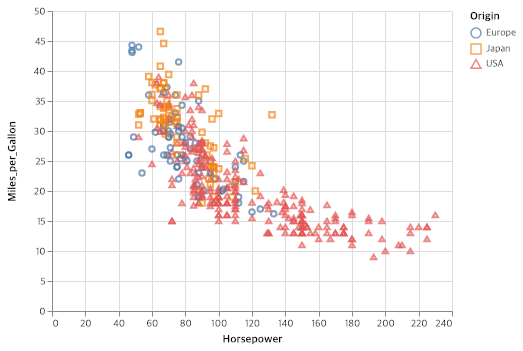

In [19]:
import altair as alt
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

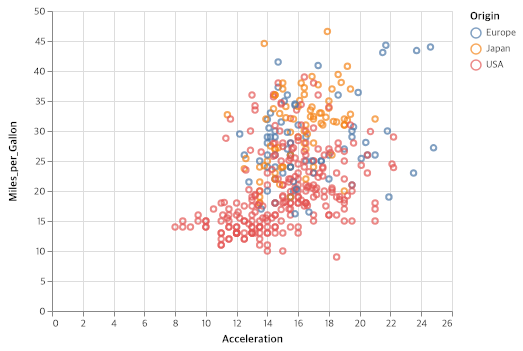

In [20]:
# shorthand syntax

alt.Chart(cars).mark_point().encode(
    x='Acceleration:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
)

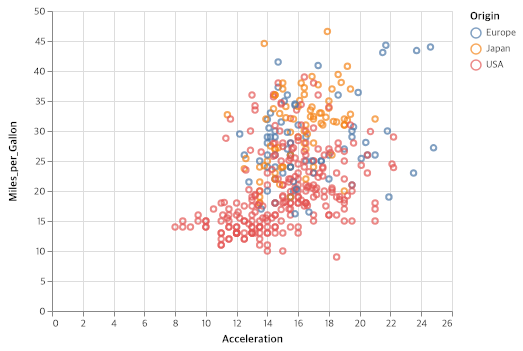

In [21]:
alt.Chart(cars).mark_point().encode(
    alt.X('Acceleration', type='quantitative'),
    alt.Y('Miles_per_Gallon', type='quantitative'),
    alt.Color('Origin', type='nominal')
)

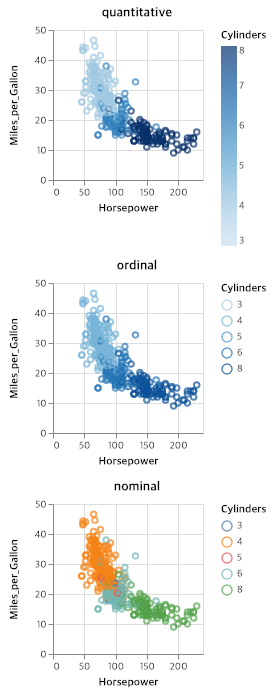

In [23]:
# Color

base = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
).properties(
    width=150,
    height=150
)

alt.vconcat(
   base.encode(color='Cylinders:Q').properties(title='quantitative'),
   base.encode(color='Cylinders:O').properties(title='ordinal'),
   base.encode(color='Cylinders:N').properties(title='nominal'),
)

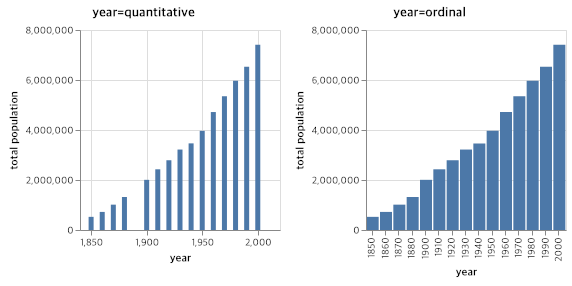

In [24]:
# Axis

pop = data.population.url

base = alt.Chart(pop).mark_bar().encode(
    alt.Y('mean(people):Q', axis=alt.Axis(title='total population'))
).properties(
    width=200,
    height=200
)

alt.hconcat(
    base.encode(x='year:Q').properties(title='year=quantitative'),
    base.encode(x='year:O').properties(title='year=ordinal')
)

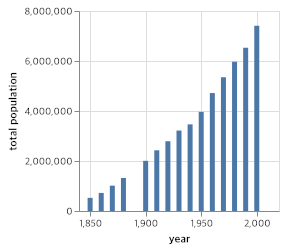

In [25]:
base.encode(
    alt.X('year:Q',
        scale=alt.Scale(zero=False)
    )
)

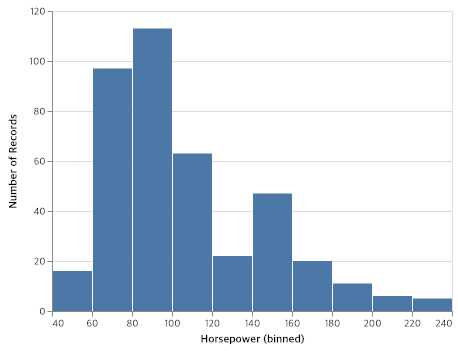

In [26]:
# database style grouping and aggregation (split-apply-combine)

alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    y='count()'
    # could also use alt.Y(aggregate='count', type='quantitative')
)

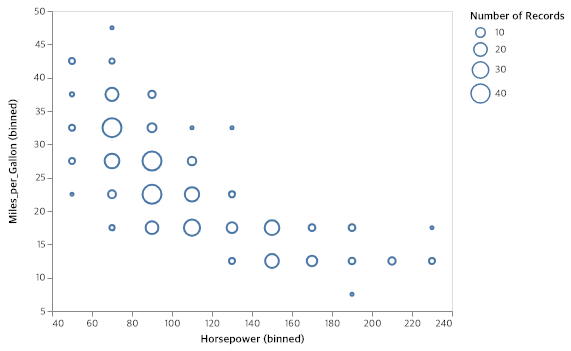

In [27]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
)

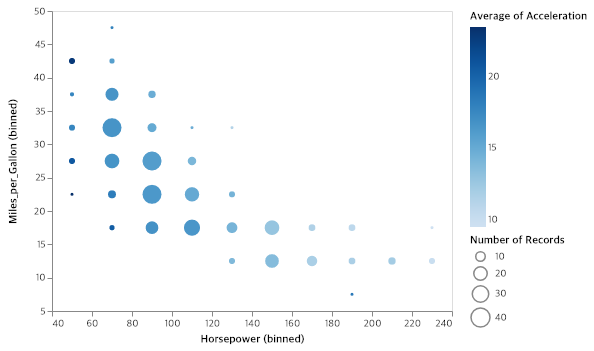

In [28]:
alt.Chart(cars).mark_circle().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
    color='average(Acceleration):Q'
)

### Encoding shorthand

|Shorthand	|Equivalent long-form|
|-----------|--------------------|
|x='name'	|alt.X('name')|
|x='name:Q'	|alt.X('name', type='quantitative')|
|x='sum(name)'	|alt.X('name', aggregate='sum')|
|x='sum(name):Q'	|alt.X('name', aggregate='sum', type='quantitative')|
|x='count():Q'	|alt.X(aggregate='count', type='quantitative')|

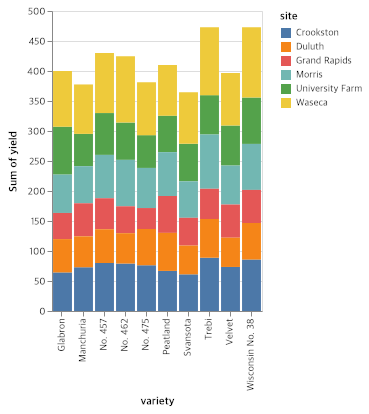

In [29]:
# controls the order of components of the stack

import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
)

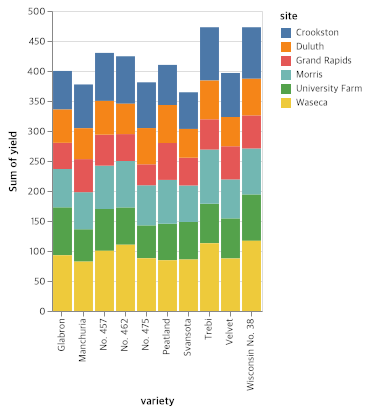

In [30]:
import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="descending")
)

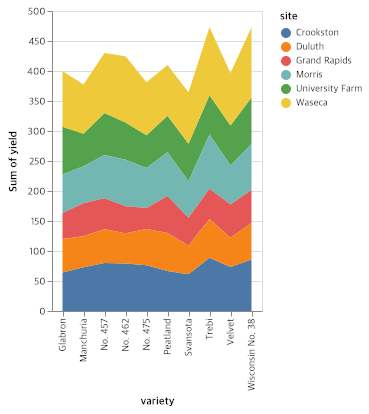

In [31]:
import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_area().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
)

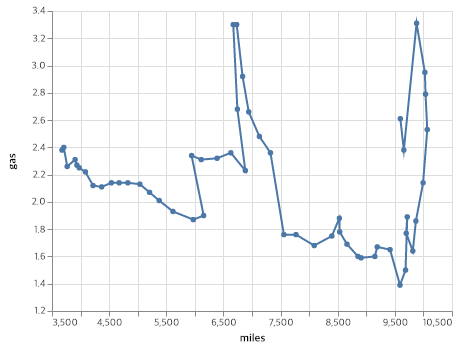

In [33]:
# For line marks, the order channel encodes the order in which data points are connected

import altair as alt
from vega_datasets import data

driving = data.driving()

alt.Chart(driving).mark_line(point=True).encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    order='year'
)

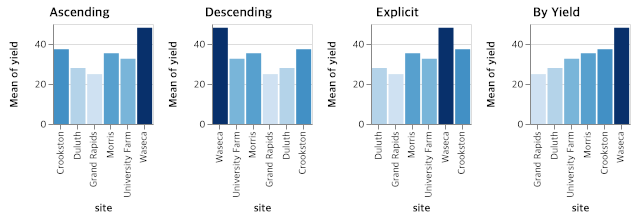

In [37]:
# Sorting Axes

import altair as alt
from vega_datasets import data

barley = data.barley()

base = alt.Chart(barley).mark_bar().encode(
    y='mean(yield):Q',
    color=alt.Color('mean(yield):Q', legend=None)
).properties(width=100, height=100)

# Sort x in ascending order
ascending = base.encode(
    alt.X(field='site', type='nominal', sort='ascending')
).properties(
    title='Ascending'
)

# Sort x in descending order
descending = base.encode(
    alt.X(field='site', type='nominal', sort='descending')
).properties(
    title='Descending'
)

# Sort x in an explicitly-specified order
explicit = base.encode(
    alt.X(field='site', type='nominal',
          sort=['Duluth', 'Grand Rapids', 'Morris',
                'University Farm', 'Waseca', 'Crookston'])
).properties(
    title='Explicit'
)

# Sort according to another field
sortfield = base.encode(
    alt.X(field='site', type='nominal',
          sort=alt.EncodingSortField(field='yield', op='mean'))
).properties(
    title='By Yield'
)

ascending | descending | explicit | sortfield

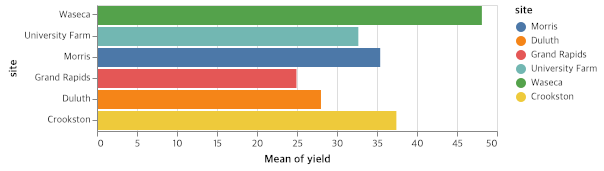

In [36]:
# Sorting legends

alt.Chart(barley).mark_rect().encode(
    alt.X('mean(yield):Q', sort='ascending'),
    alt.Y('site:N', sort='descending'),
    alt.Color('site:N',
        sort=['Morris', 'Duluth', 'Grand Rapids',
              'University Farm', 'Waseca', 'Crookston']
    )
)